In [80]:
import random
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\simon\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['random', 'indices']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [81]:
import numpy
from numpy import transpose
from numpy.random import shuffle
import matplotlib.pyplot as plt
from queue import PriorityQueue
from dataclasses import dataclass, field
from typing import Any

(33, 33)


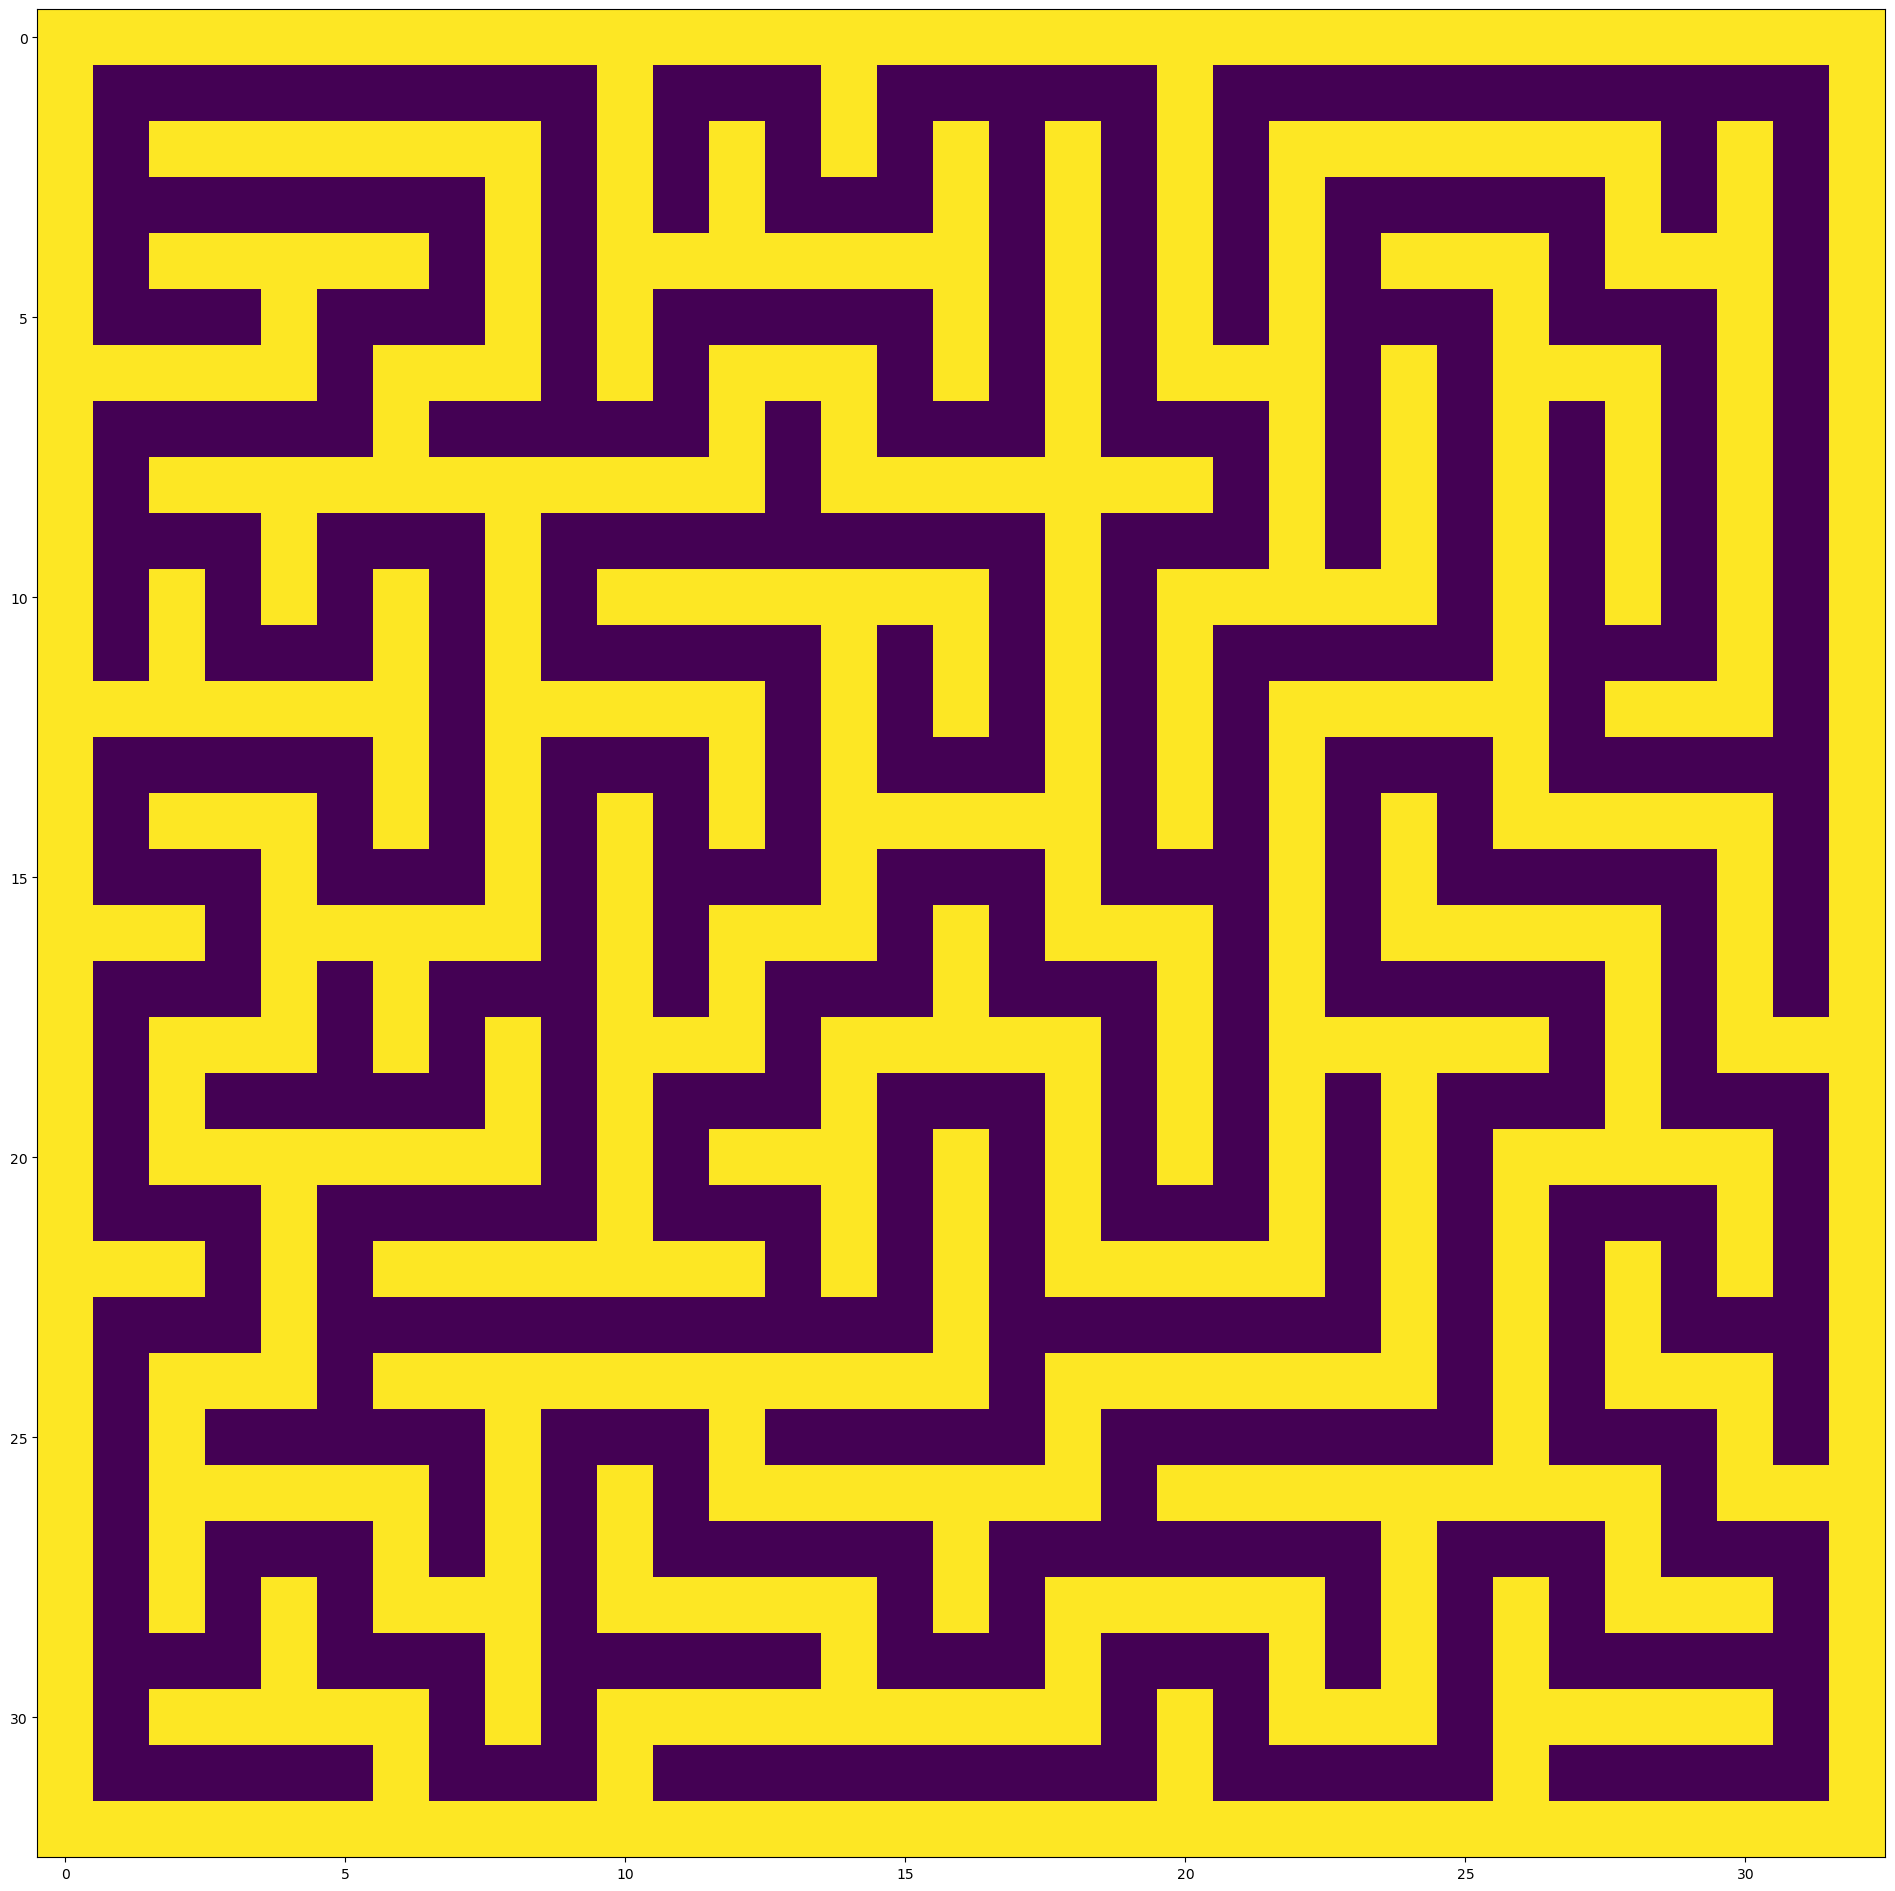

In [82]:
h = 16
w = 16

def make_maze(width, height):
    vis = [[0] * width + [1] for _ in range(height)] + [[1] * (width + 1)]
    ver = [["10"] * width + ['1'] for _ in range(height)] + [[]]
    hor = [["11"] * width + ['1'] for _ in range(height + 1)]

    def walk(step_x, step_y):
        vis[step_y][step_x] = 1

        d = [(step_x - 1, step_y),
             (step_x, step_y + 1),
             (step_x + 1, step_y),
             (step_x, step_y - 1)]
        shuffle(d)
        for (x, y) in d:
            if vis[y][x]: continue
            if x == step_x: hor[max(step_y, y)][x] = "10"
            if y == step_y: ver[y][max(step_x, x)] = "00"
            walk(x, y)

    walk(numpy.random.randint(width), numpy.random.randint(height))

    s = ""
    for (a, b) in zip(hor, ver):
        s += ''.join(a + ['\n'] + b + ['\n'])

    maze=[]
    for line in s.split("\n"):
        if line != "":
            row=[]
            for instance in line:
                row.append(int(instance))
            maze.append(row)
    return maze

plt.figure(figsize=(24,24))
maze=numpy.array(make_maze(h,w))
plt.imshow(maze)
print(maze.shape)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


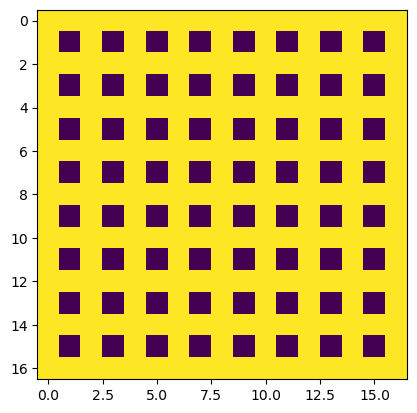

In [83]:
m=numpy.ones((17,17))
for i in range(8):
    for j in range(8):
        m[1+(i*2)][1+(j*2)]=0
plt.imshow(m)
print(m)

In [84]:
def get_valid_neighbours(x,y):
    nb=list()
    xm=[0,1,0,-1]
    ym=[1,0,-1,0]
    for o in range(4):
        nb.append([x+xm[o],y+ym[o]])
    return nb

# Returns a list of neighbours in the order of N,E,S,W
def get_valid_neighbours(maze, location):
    nb=list()
    xm=[0,1,0,-1]
    ym=[1,0,-1,0]
    for o in range(4):
        if maze[location[0]+xm[o]][location[1]+ym[o]] == 0:
            nb.append([location[0]+xm[o],location[1]+ym[o]])
    return nb


In [85]:
def getRandomTarget():
    x = random.randint(1, w)
    y = random.randint(1, h)
    while maze[x][y] == 1:
        x = random.randint(1, w)
        y = random.randint(1, h)
    print(x,y)
    return [x,y]

startLocation=getRandomTarget()
targetLocation=getRandomTarget()
distances = numpy.zeros(maze.shape) - 1
frontier = [startLocation]
distances[startLocation[0]][startLocation[1]] = 0
currentDistance = 1

1 13
14 7


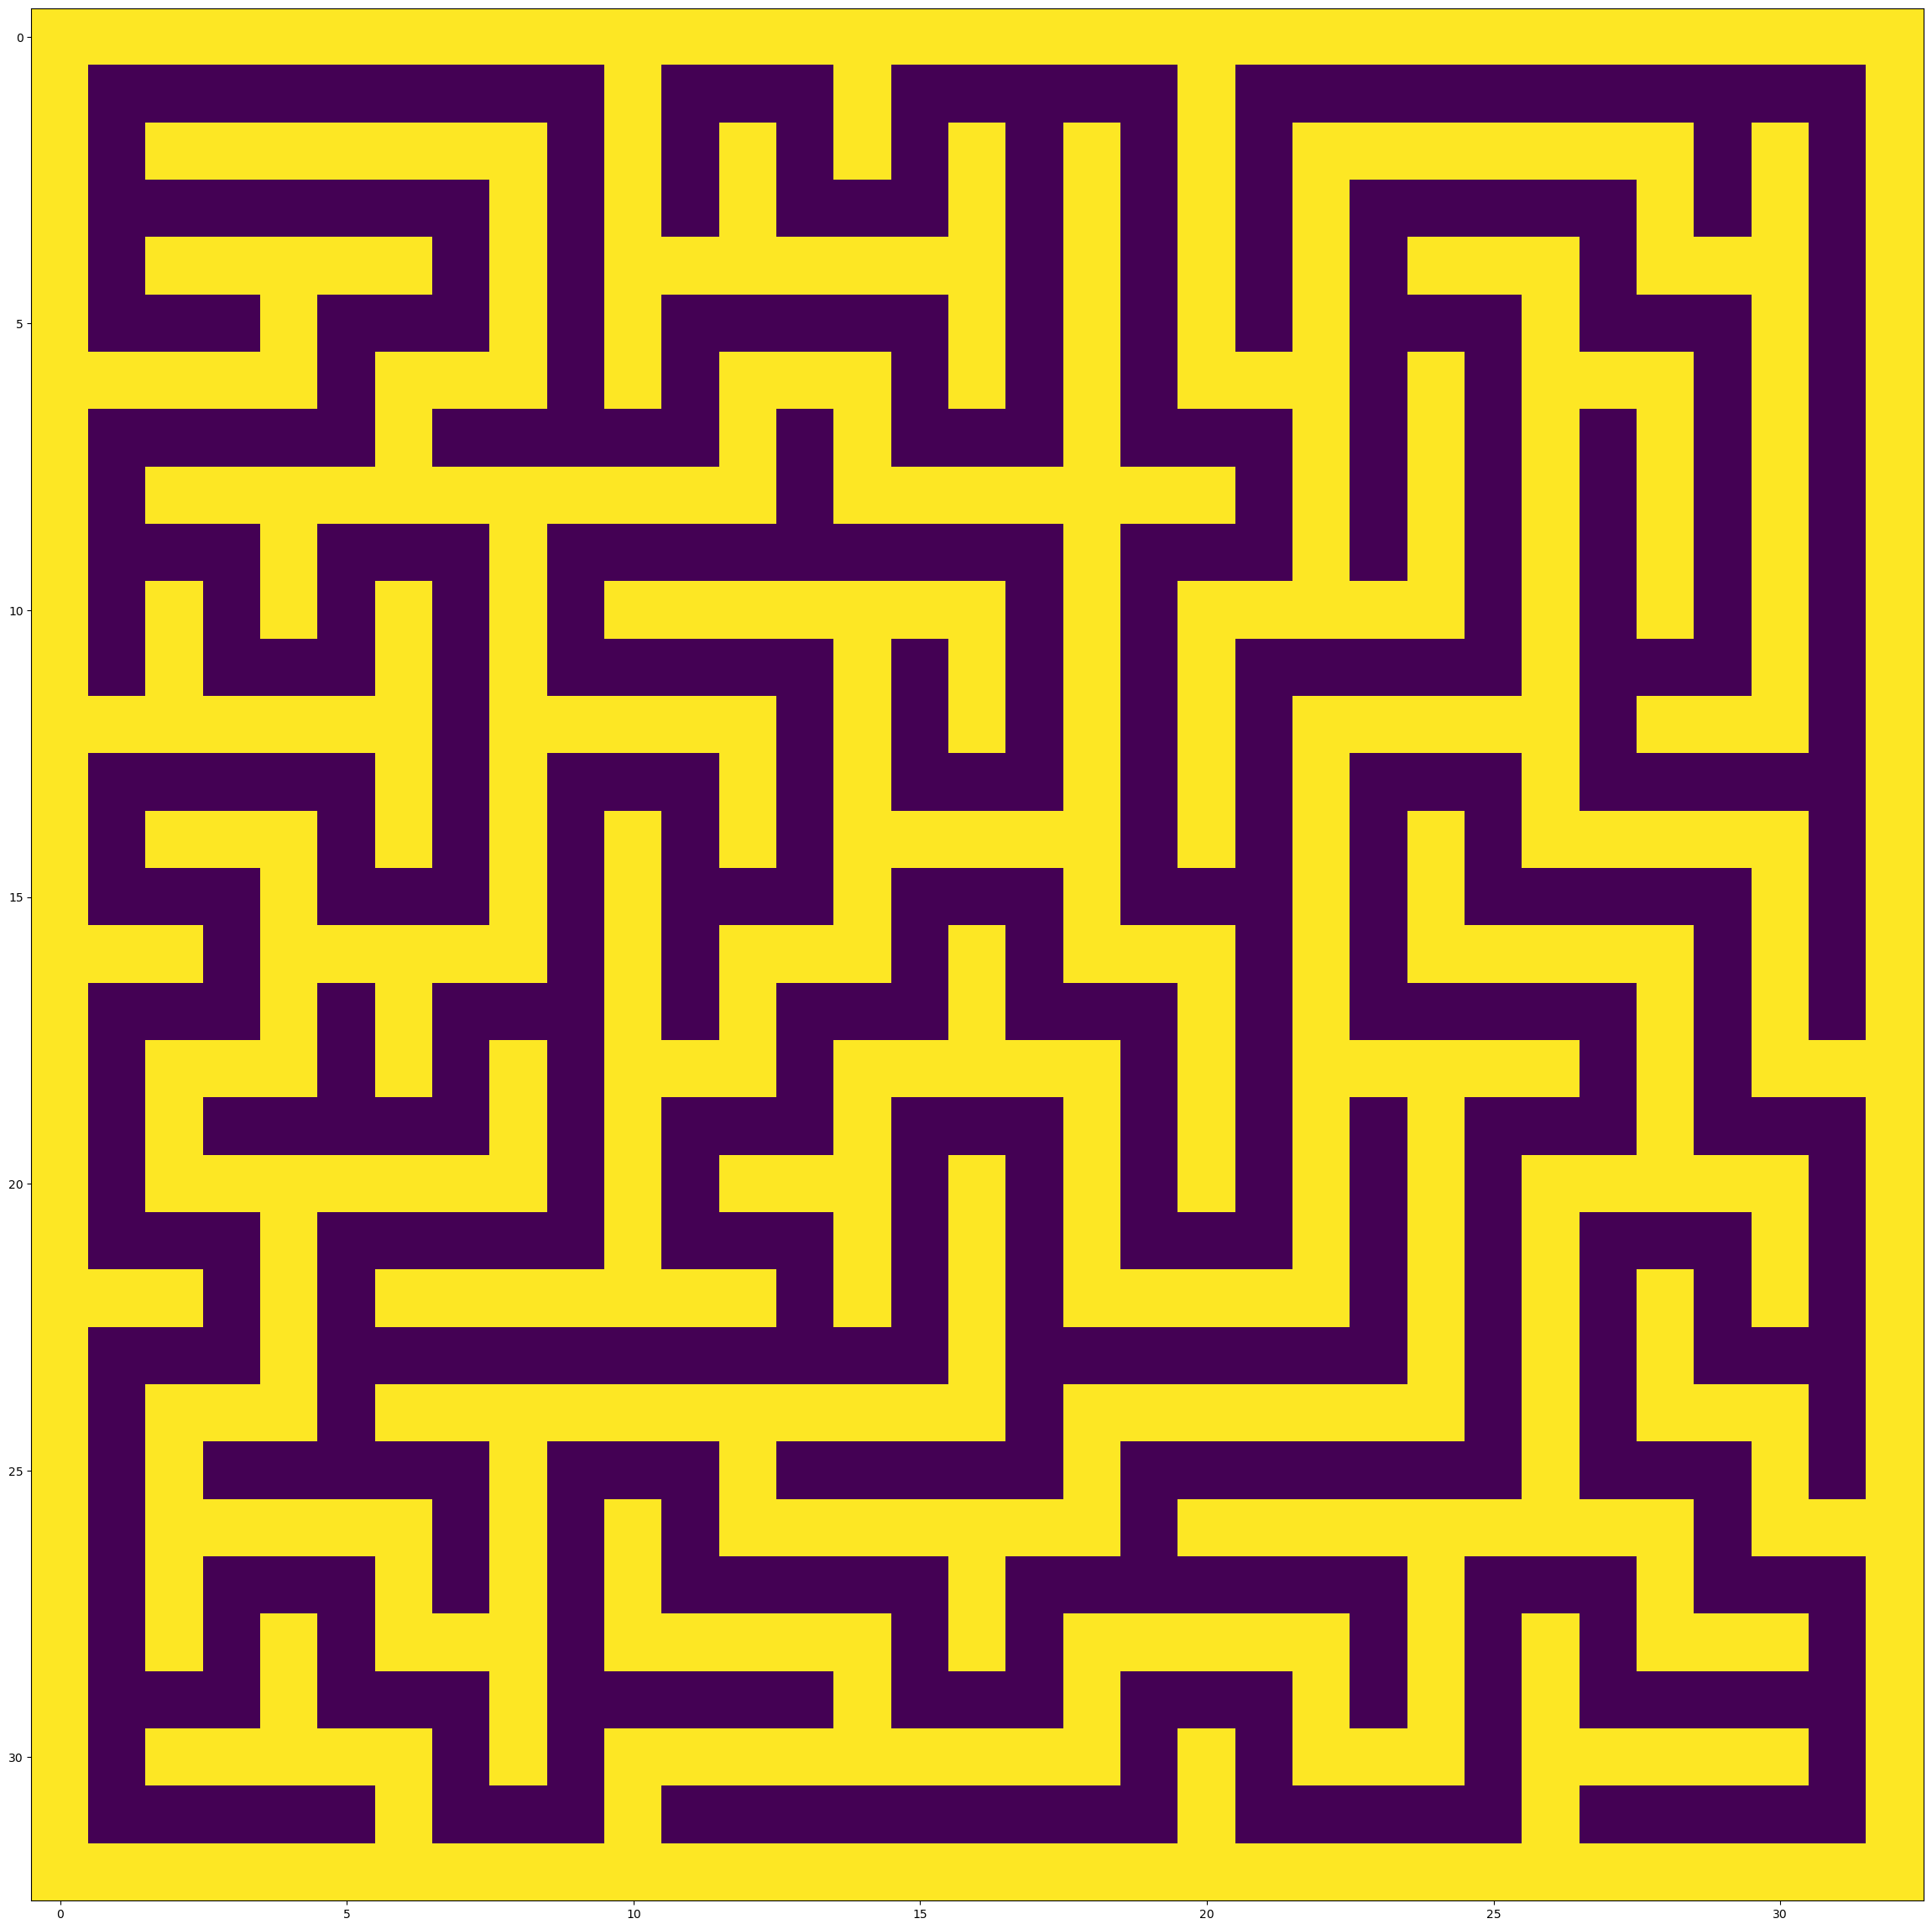

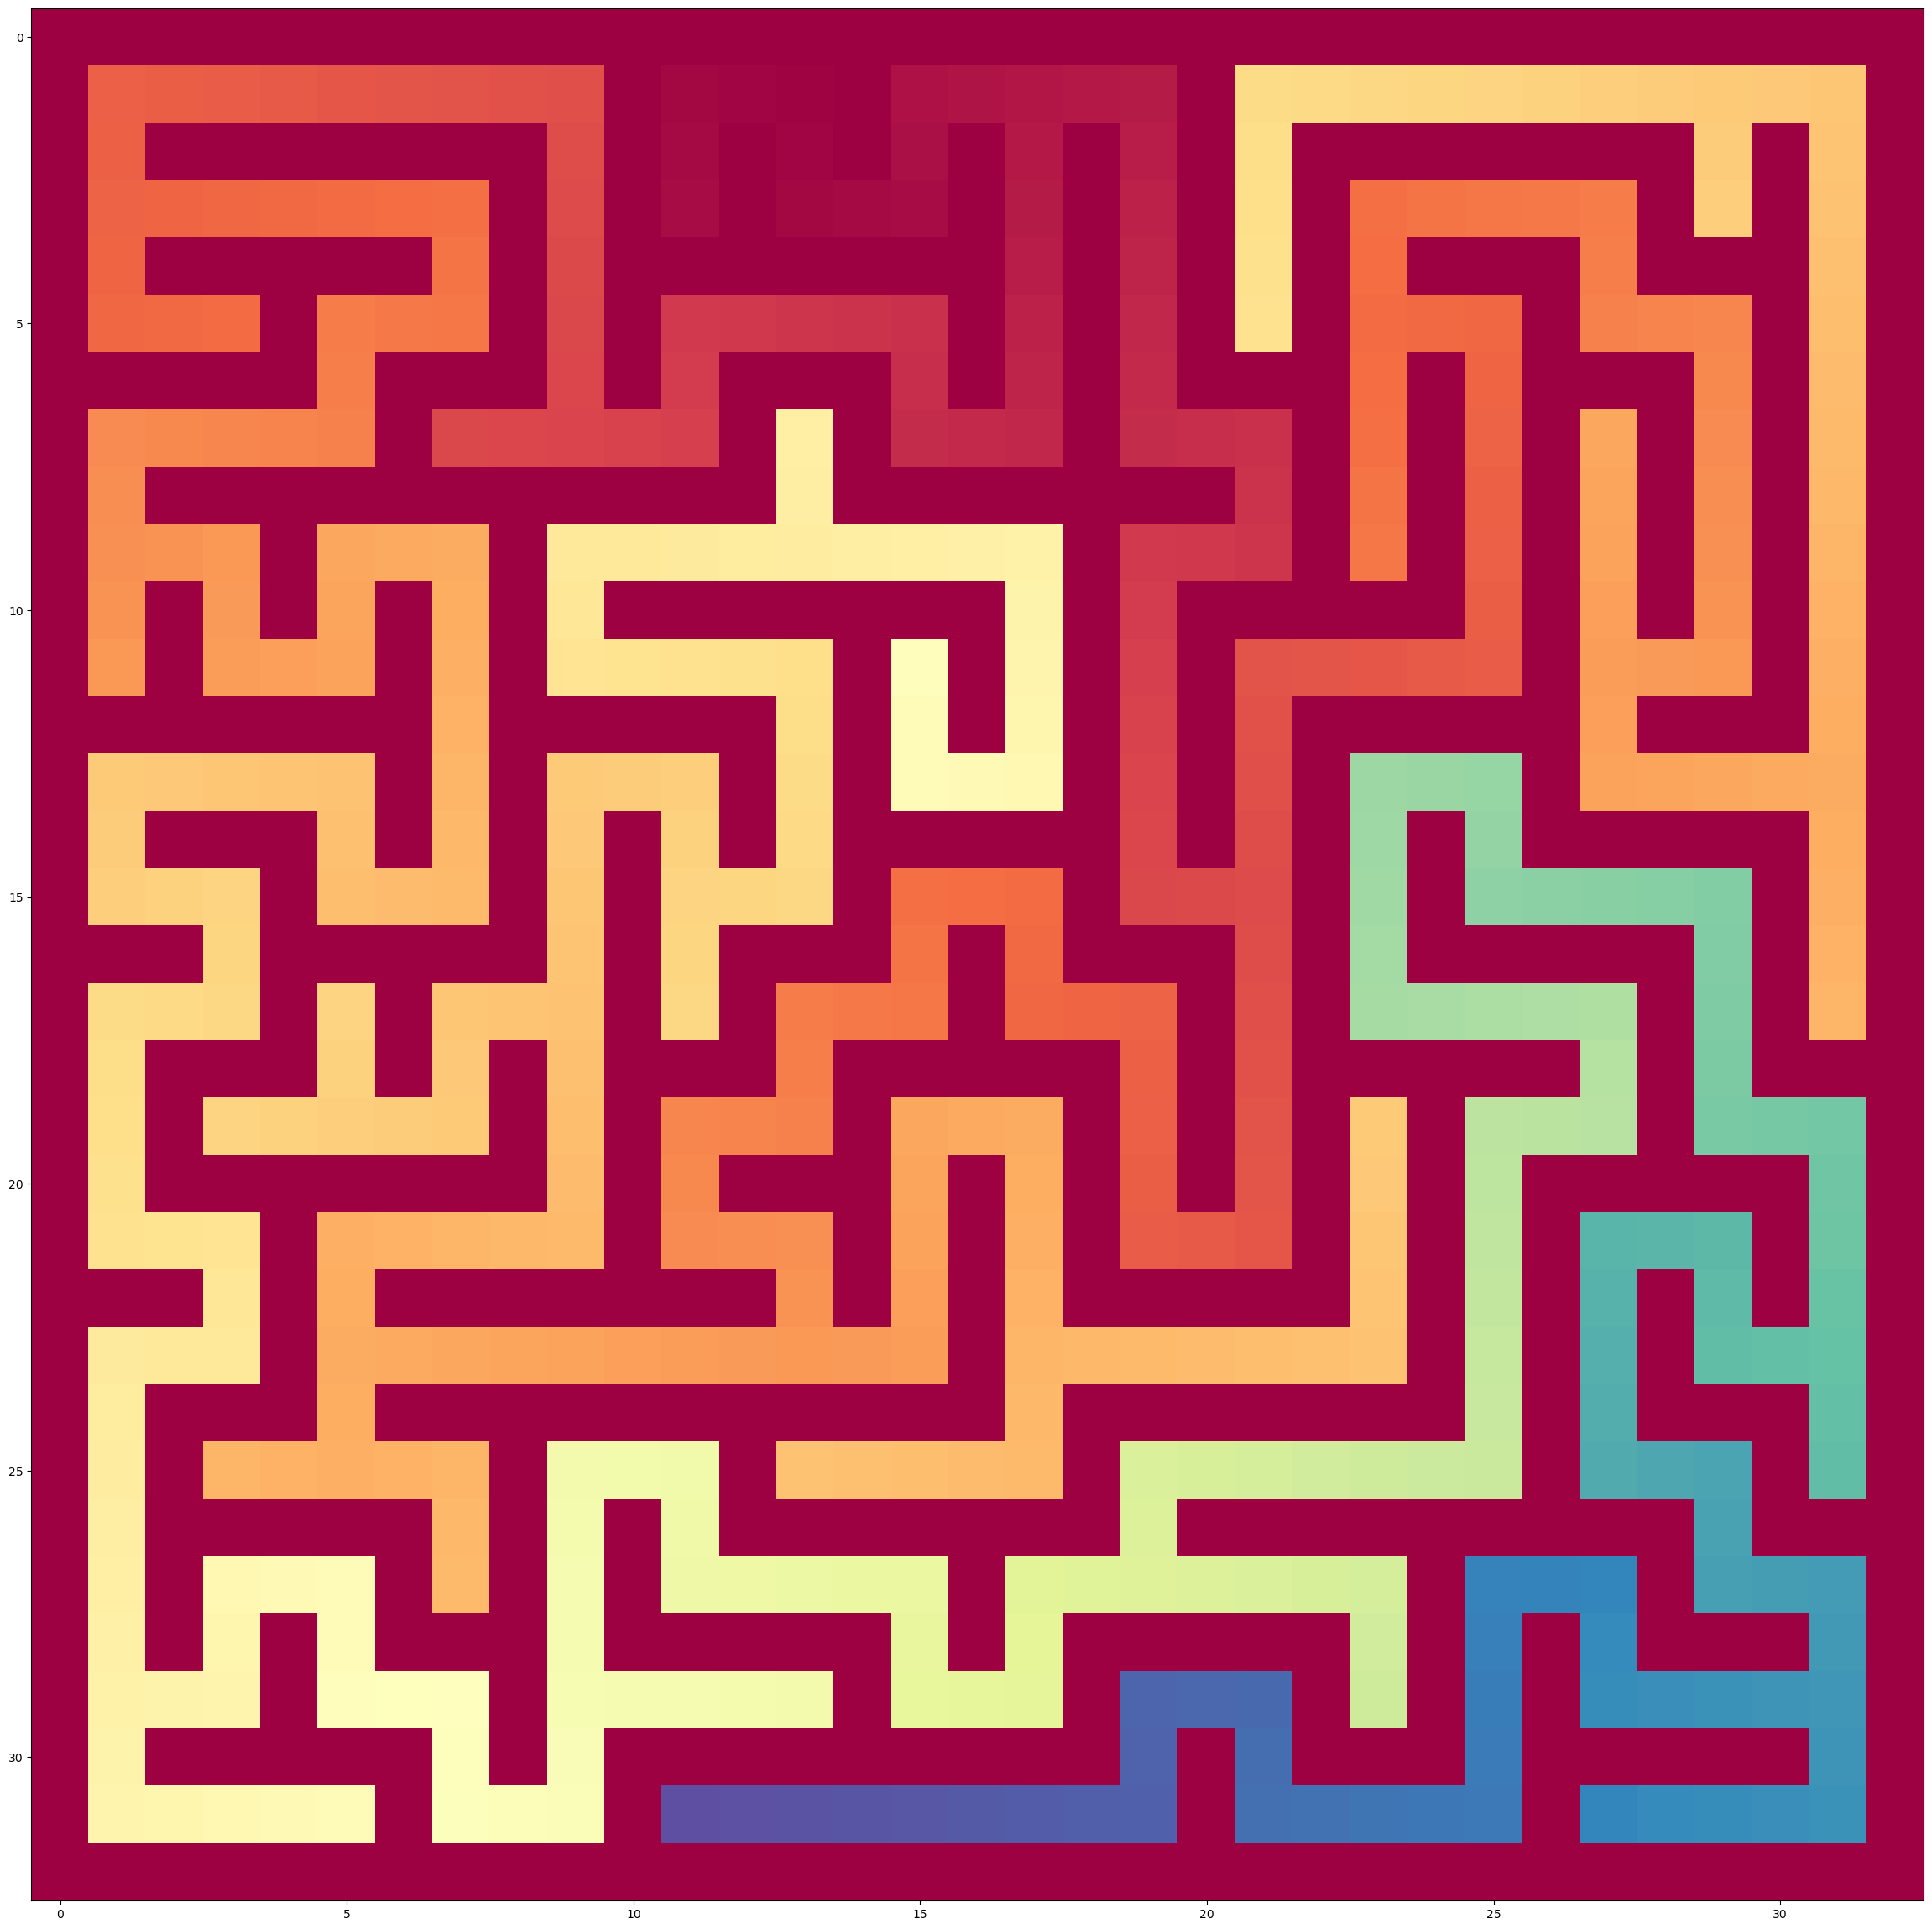

In [86]:
while len(frontier) > 0:
    newFrontier = list()
    for curr in frontier:
        neighbours = get_valid_neighbours(maze, curr)
        for neighbour in neighbours:
            if maze[neighbour[0]][neighbour[1]] == 0 and distances[neighbour[0]][neighbour[1]] < 0.0:
                distances[neighbour[0]][neighbour[1]] = currentDistance
                newFrontier.append(neighbour)
    frontier = newFrontier
    currentDistance += 1

plt.figure(figsize=[64,32])
plt.subplot(1,2,1)
plt.imshow(maze)
plt.figure(figsize=[64,32])
plt.subplot(1,2,2)
plt.imshow(distances, cmap='Spectral')

In [87]:
@dataclass(order = True)
class PrioritizedItem:
    priority: int
    item: Any=field(compare = False)

    def get_item(self):
        return self.item

def heuristic(startNode, endNode):
    x1, y1 = startNode
    x2, y2 = endNode
    return abs(x1 - x2) + abs(y1 - y2)

def AS(maze, startNode, endNode):
    front = PriorityQueue()                                                     # Sets up the 'front' (frontier) PriorityQueue().
    front.put(PrioritizedItem(heuristic(startNode, endNode), startNode))        # Adds the starting position into the frontier.
    exp = list()                                                                # Sets up the 'explored' List for storing visited nodes.
    while front.qsize() != 0:                                                   # If the frontier isnt empty then loop.
        cc = front.get()                                                        # Pop the lowest-value (highest priority) Item from the Queue.
        if cc.get_item() in exp:                                                # If the 'item' (Coords-Array) in the PrioritizedItem is in the 'explored' list.
            continue                                                            #   - Then skip this loop, this avoids a deadlock due to rolling between the same cells.
        if cc.get_item() == endNode:                                            # If the 'item' (Coords-Array) in the PrioritizedItem is the end-node.

            return "Successful!", exp + [endNode]                               #   - Then print that it was successfully found along side the explored array and the endNode.
        for nb in get_valid_neighbours(maze, cc.get_item()):                    # Loop ForEach valid neighbour (Valid is if the array value is 0).
            if maze[nb[0]][nb[1]] == 0:                                         # Double-Check that the neighbour Coordinates are in-fact of integer value 0.
                front.put(PrioritizedItem(heuristic(neighbour, endNode), nb))   # If it is then add the neighbour to the frontier.
        exp.append(cc.get_item())                                               # Then append the coordinates of this cell to the 'explored' list.
    return "Failure!", exp                                                      # Error if failed.

Starting Location:  [1, 13]
Target Location:  [14, 7]
--------------------------------------
Answer:  Successful!
Explored:  [[1, 13], [2, 13], [1, 12], [3, 13], [1, 11], [3, 14], [2, 11], [3, 11], [3, 15], [2, 15], [1, 15], [1, 16], [1, 17], [2, 17], [1, 18], [3, 17], [4, 17], [5, 17], [1, 19], [6, 17], [7, 17], [7, 16], [2, 19], [7, 15], [3, 19], [6, 15], [5, 15], [4, 19], [5, 14], [5, 13], [5, 19], [5, 12], [5, 11], [6, 19], [6, 11], [7, 11], [7, 10], [7, 19], [7, 9], [7, 20], [6, 9], [7, 8], [5, 9], [7, 7], [7, 21], [4, 9], [8, 21], [9, 21], [3, 9], [9, 20], [2, 9], [9, 19], [1, 9], [10, 19], [1, 8], [11, 19], [12, 19], [1, 7], [13, 19], [14, 19], [1, 6], [15, 19], [15, 20], [1, 5], [15, 21], [16, 21], [14, 21], [1, 4], [17, 21], [13, 21], [1, 3], [18, 21], [12, 21], [1, 2], [11, 21], [1, 1], [2, 1], [11, 22], [19, 21], [3, 1], [20, 21], [4, 1], [3, 2], [21, 21], [3, 3], [21, 20], [5, 1], [3, 4], [21, 19], [5, 2], [20, 19], [5, 3], [3, 5], [19, 19], [18, 19], [3, 6], [11, 23], [17,

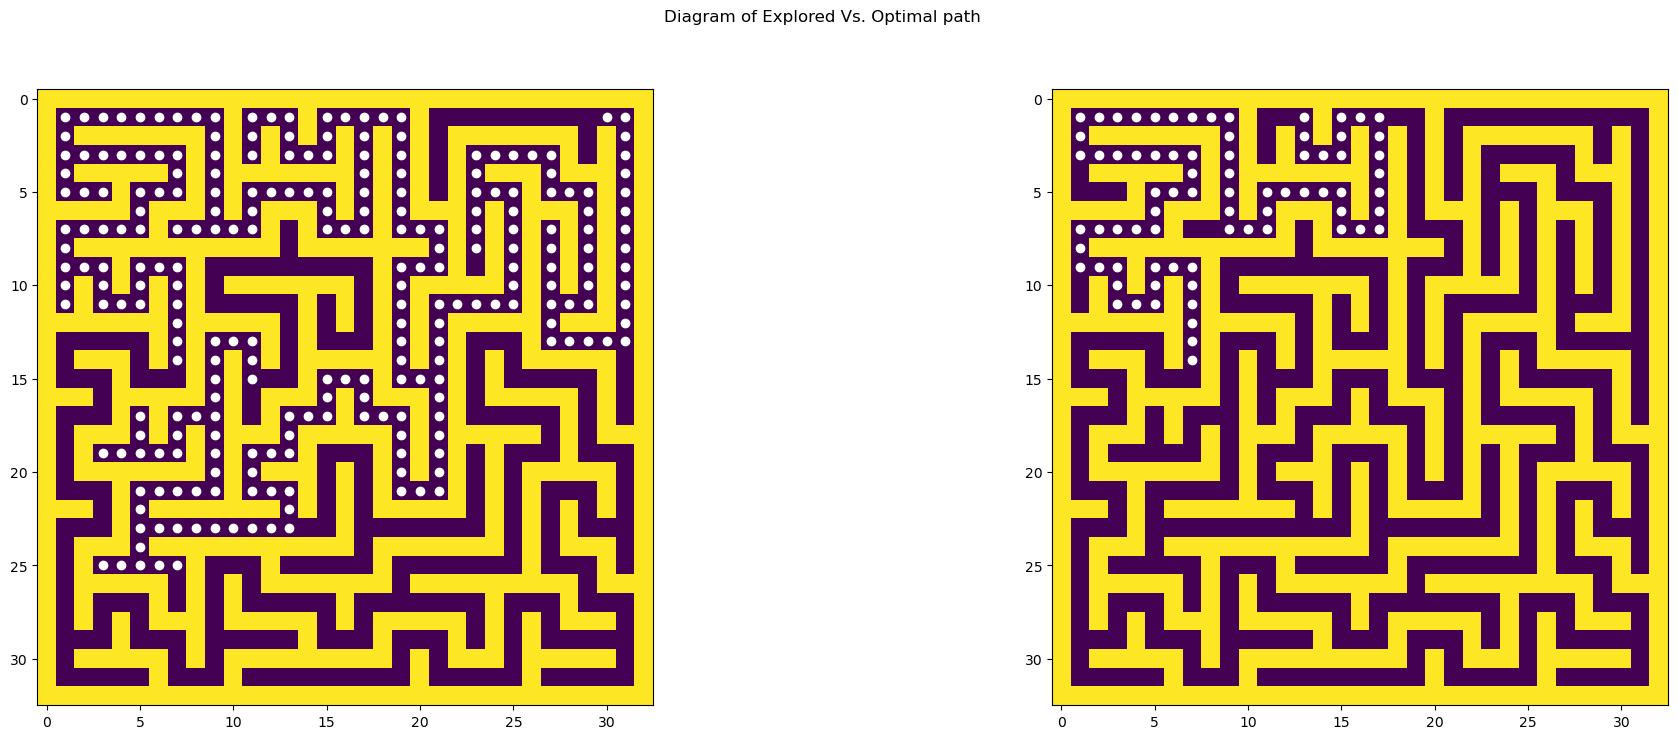

In [89]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,8))

fig.suptitle('Diagram of Explored Vs. Optimal path')

print('Starting Location: ', startLocation)
print('Target Location: ', targetLocation)
print('--------------------------------------')
answer, exp = AS(maze, startLocation, targetLocation)
print('Answer: ', answer)
print('Explored: ', exp)
ax1.imshow(maze)
ax1.plot(transpose(exp)[1], transpose(exp)[0], 'ow')
print('--------------------------------------')

currentLocation = targetLocation
path=[]
while currentLocation != startLocation:
    path.append(currentLocation)
    neighbours = get_valid_neighbours(maze, currentLocation)
    indices = []
    for nb in neighbours:
        if nb in exp:
            indices.append(exp.index(nb))
    currentLocation = exp[min(indices)]
path.append(startLocation)
print('Optimal Path: ', path)
ax2.imshow(maze)
ax2.plot(transpose(path)[1], transpose(path)[0], 'ow')